## Padé-Laplace method

https://physics.uncg.edu/hellen/pade_laplace/pade-laplace.html

E. Hellen, Padé –Laplace analysis of signal averaged voltage decays
obtained from a simple circuit, Am. J. Phys. 73(9), (2005)

https://physics.uncg.edu/hellen/pade_laplace/HellenAJPSept05.pdf

$$L(s) = \int e^{-st}f(t) dt$$

In discrete form:

$$
L(s) = \Delta t \left( \frac{e^{-st_1}f_1 + e^{-st_N}f_N}{2}+ \Sigma_{j=2} ^{N-1}e^{-st_j}f_j\right)
$$

Taylor expansion:
$$L(s) = \Sigma_{j=0} ^{\infty} d_j (s-s_0)^j$$

Padé aprroximation for the Taylor expansion:
$$
\frac{a_0 + a_1(s-s_0)+a_2(s-s_0)^2+a_3(s-s_0)^3 + ... + a_{n-1}(s-s_0)^{n-1}}{1 + b_1(s-s_0) + b_2(s-s_0)^2 +...+b_n(s-s_0)^n} = \Sigma_{j=0} ^{2n-1} d_j (s-s_0)^j
$$

The coefficients are :
$$d_i = \left( \frac{d^{(i)}L}{ds^{(i)}}\right)_{s=s_0} = \Delta t \left( \frac{(-t_1)^{i}e^{-s_0t_1}f_1 +(-t_N)^{i} e^{-s_0t_N}f_N}{2}+ \Sigma_{j=2} ^{N-1}(-t_j)^{i}e^{-s_0t_j}f_j\right)$$


"It requires numerical evaluation at a point $p_0$ .
A good choice for $p_0$ is the inverse of the time it takes for the
data to decay to $1/2$ its initial value."



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### Calculating the ith derivative of the Laplace transform: 

In [3]:
def calcIthDerivative(t, x, i, s0):
    deltaT = t[1]-t[0]
    endpoints = (((-t[0])**i) * np.exp(-s0 * t[0]) * x[0] + ((-t[-1])**i) * np.exp(-s0 * t[-1]) * x[-1]) / 2.
    summ = 0.
    N = len(t)
    for j in range(1, N):
        summ = summ + (-t[j])**i * np.exp(-s0 * t[j]) * x[j]
    return deltaT * (endpoints + summ)

### Generating the first 2n-1 derivatives

In [69]:
def calc2NDerivatives(t, x, N, s0):
    ds = []
    for j in range(2*N):
        dj = calcIthDerivative(t, x, j, s0)
        ds.append(dj)
        #print(j)
    return ds

#calc2NDerivatives(x, y, 3, s0)

### Scipy implementation

In [54]:

from scipy.interpolate import pade
def polesNorder(t,x, n, s0):
    ds =  calc2NDerivatives(x, y, n, s0)
    p,q = pade(np.array(ds), n)
#    pcoeff,qcoeff = makePolynomials(rhs, b, n)
    res, poles, k = signal.residue(p, q)
    return (poles, res)

## Test:

$$
X(t) = A_1e^{-\lambda_1 t}+ A_2e^{-\lambda_2 t}
$$

$$ A_1 = 5, \ A_2 = 2, \lambda_1 = -5,  \  \lambda_2 = -1$$

In [98]:
x = np.arange(0., 4., 0.0001)
y = 5*np.exp(-5*x) + 3*np.exp(-1*x)

Text(0,0.5,'X')

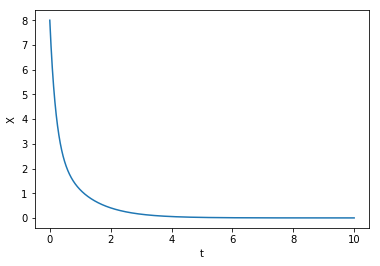

In [91]:
plt.plot(x,y)
plt.xlabel('t')
plt.ylabel('X')

In [92]:
def chooseS0(x, y, tolerance = 0.01):
    half = x[np.abs(y-np.max(y)/2.)< tolerance]
    s0 = 1./half[0]
    return s0

In [93]:
s0 = chooseS0(x, y)
print(s0)

4.426737494466578


In [104]:
print("n= 1\n")
n1 = polesNorder(x, y,1, s0)
print("Poles: \t Residue: \n")
print("Poles:", n1[0], " \t", n1[1], "\n")


print("n= 2\n")
n2 = polesNorder(x, y,2, s0)
print("Poles: \t Residue: \n")
print("Poles:", n2[0], " \t", n2[1], "\n")

print("n= 3\n")
n3 = polesNorder(x, y,3, s0)
print("Poles: \t Residue: \n")
print("Poles:", n3[0], " \t", n3[1], "\n")

n= 1

Poles: 	 Residue: 

Poles: [-3.60394659]  	 [-17.78281701] 

n= 2

Poles: 	 Residue: 

Poles: [-5.44526358 -1.26454845]  	 [-22.71617705  -0.964257  ] 

n= 3

Poles: 	 Residue: 

Poles: [-6.8637629  -1.81556702 -0.72478867]  	 [-23.6731576   -2.59021143  -0.04246414] 



## Discrete Laplace transform
From https://github.com/guillaume-chevalier/filtering-stft-and-laplace-transform

In [43]:

def laplace_transform(x, real_sigma_interval=np.arange(-1, 1+ 0.001, 0.001)):
    # Returns the Laplace transform where the first axis is the real range and second axis the imaginary range. 
    # Complex numbers are returned. 
    
    x = np.array(x)[::-1]  # The transform is from last timestep to first, so "x" is reversed
    
    d = []
    for sigma in real_sigma_interval:
        exp = np.exp( sigma*np.array(range(len(x))) )
        exp /= np.sum(exp)
        exponentiated_signal = exp * x
        # print (max(exponentiated_signal), min(exponentiated_signal))
        d.append(exponentiated_signal[::-1])  # re-reverse for straight signal
    
    # Now apply the imaginary part and "integrate" (sum)
    return np.array([np.fft.rfft(k) for k in d])


In [44]:
l = laplace_transform(x).transpose()


C:\Users\balin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


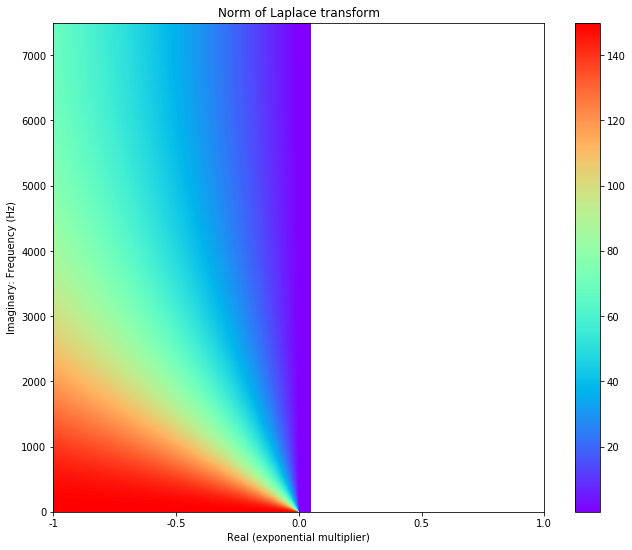

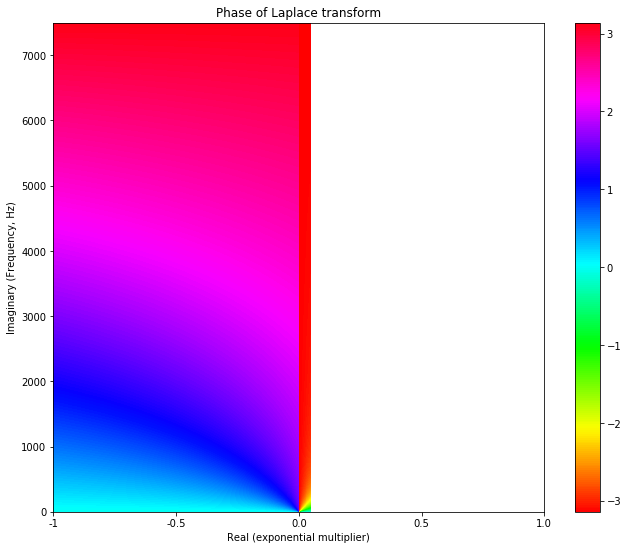

In [59]:
plt.figure(figsize=(11, 9))
plt.title("Norm of Laplace transform")
plt.imshow(norm_surface, aspect='auto', interpolation='none', cmap=plt.cm.rainbow)
plt.ylabel('Imaginary: Frequency (Hz)')
plt.xlabel('Real (exponential multiplier)')
plt.xticks([0, 500, 1000, 1500, 2000], [-1, -0.5, 0.0, 0.5, 1.0])
plt.gca().invert_yaxis()
plt.colorbar()

plt.figure(figsize=(11, 9))
plt.title("Phase of Laplace transform")
plt.imshow(angle_surface, aspect='auto', interpolation='none', cmap=plt.cm.hsv)
plt.ylabel('Imaginary (Frequency, Hz)')
plt.xlabel('Real (exponential multiplier)')
plt.xticks([0, 500, 1000, 1500, 2000], [-1, -0.5, 0.0, 0.5, 1.0])
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()